In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')

from itertools import cycle, islice



In [2]:
# Read School and Student Data File and store into Pandas Data Frames
co2_ems_df = pd.read_csv("CO2Ems10YrResIndComTrn.csv")
co2_ems_df = co2_ems_df[["sector", "source", "year", "value"]]
co2_ems_df = co2_ems_df.loc[co2_ems_df["source"] != "Total Energy" ]

# & co2_ems_df["source"] != "Total Energy"

In [3]:
co2_ems_df.dtypes

sector     object
source     object
year        int64
value     float64
dtype: object

In [4]:
co2_ems_df

,sector,source,year,value
0,Industrial,Coal,2018,109.967
1,Industrial,Coal,2017,111.616
2,Industrial,Coal,2016,112.702
3,Industrial,Coal,2015,128.941
4,Industrial,Coal,2014,143.075
5,Industrial,Coal,2013,144.563
6,Industrial,Coal,2012,141.470
7,Industrial,Coal,2011,145.983
8,Industrial,Coal,2010,152.679
9,Industrial,Coal,2009,130.545


In [5]:
# co2_ems_10Y_nosingle_df = co2_ems_10Y_df.loc[co2_ems_10Y_df["source"] == "Jet Fuel", "source"] = "Sector Specific"
# co2_ems_10Y_nosingle_df

# d = {"Jet Fuel":"Sector Specific","Lubricants":"Sector Specific", "Other":"Sector Specific", "Transportation":"Sector Specific"}
d = {"Jet Fuel":"Sector Specific",
     "Electric Power":"Sector Specific", 
     "Other":"Sector Specific", 
     "Aviation Gasoline":"Sector Specific",
    "Transportations":"Sector Specific",
    "Residentials":"Sector Specific",
    "Electric Power":"Sector Specific"}
# d = {"Jet Fuel":"Sector Specific"}
#      ,"Electric Power":"Sector Specific", "Other":"Sector Specific", "Aviation Gasoline":"Sector Specific" }

co2_ems_nosingle_df = co2_ems_df.replace(d)

# co2_ems_10Y_nosingle_df
# df1.loc[df1['stream'] == 2, 'feat'] = 10




In [6]:
co2_ems_pivot_df = co2_ems_nosingle_df.pivot_table(values = "value", 
                           index = ["source"],columns = "sector" )
co2_ems_pivot_df

sector,Commercial,Industrial,Residental,Transportation
source,,,,
Coal,3.9984,132.1541,NaN,0.0000
Distillate Fuel Oil,26.1913,88.7431,36.9063,428.4636
HGL,9.4346,48.3852,29.6618,0.5806
Kerosene,0.1613,0.2014,1.0520,NaN
Lubricants,NaN,4.7878,NaN,5.3793
Motor Gasoline,11.6340,16.8014,NaN,1082.8919
Natural Gas,174.5048,470.6199,255.0470,41.2116
Petroleum,49.5564,344.4765,67.6202,1792.0590
Petroleum Coke,0.0376,65.5721,NaN,NaN


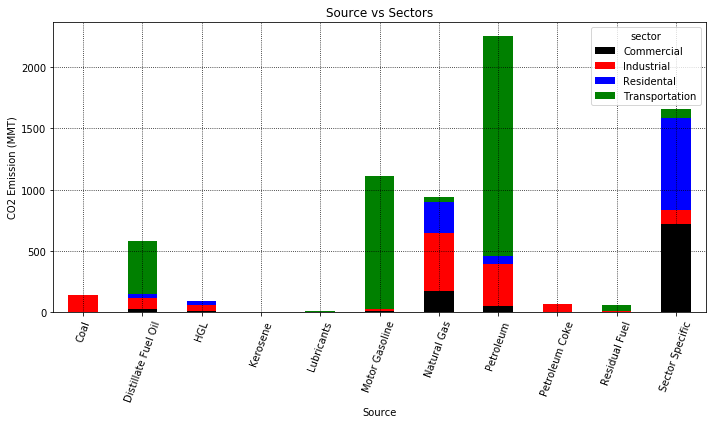

In [11]:
my_colors = list(islice(cycle(['black', 'red', 'blue', 'green']), None, len(co2_ems_pivot_df)))
                 
ax = co2_ems_pivot_df.plot(kind='bar', stacked=True, color=my_colors, figsize=(10, 6))
# ax.figure(figsize=(12, 8))
ax.set_title("Source vs Sectors")
ax.set_xlabel("Source")
ax.set_ylabel("CO2 Emission (MMT)")
plt.grid(b=True, which='major', color='black', linestyle=':')

plt.xticks(rotation=70)
plt.tight_layout()  
plt.savefig("CO2EmissionSourcesVsSectors.png")
# plt.show()           

In [74]:
co2_ems_10Y_gdf = co2_ems_nosingle_df.groupby(["sector"])["value"].sum().rename(columns={'value': 'values'})

co2_ems_10Y_gdf1 = pd.DataFrame({"total_emissions": co2_ems_10Y_gdf})

co2_ems_10Y_gdf1 = co2_ems_10Y_gdf1.reset_index()

co2_ems_10Y_gdf1

,sector,total_emissions
0,Commercial,9961.470
1,Industrial,12917.273
2,Residental,11431.412
3,Transportation,36294.132


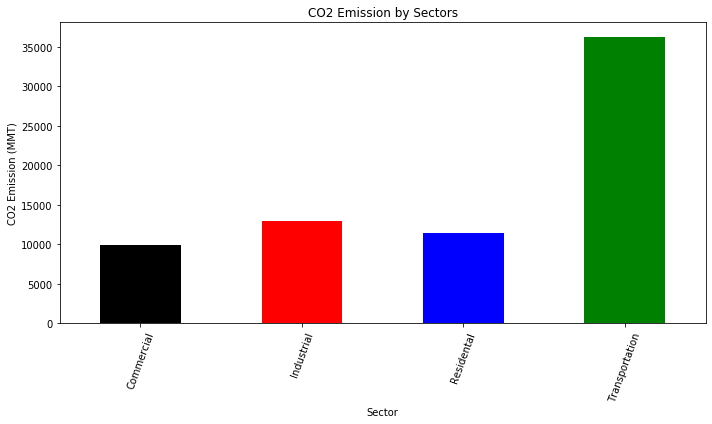

In [89]:
# my_colors = list(islice(cycle(['black', 'red', 'blue', 'green']), None, len(co2_ems_10Y_gdf1))) color=my_colors,
ax = co2_ems_10Y_gdf1.plot(x= 'sector',
                           y='total_emissions',
                           kind='bar', 
                           title="CO2 Emission by Sectors",
                           color = ({'b','r','g','k'}),
                           figsize=(10, 6))
# ax.figure(figsize=(12, 8))
#ax.set_title("CO2 Emission by Sectors")
ax.set_xlabel("Sector")
ax.set_ylabel("CO2 Emission (MMT)")
# x_labels = pd.Series((v[1] for v in co2_ems_10Y_gdf1))
# ax.set_xticklabels(x_labels)
#plt.grid(b=True, which='major', color='black', linestyle=':')
plt.xticks(rotation=70)
plt.legend().remove()
# for i, txt in enumerate(co2_ems_10Y_gdf1.total_emissions):
#     ax.annotate(txt, (co2_ems_10Y_gdf1.sector.iat[i],co2_ems_10Y_gdf1.total_emissions.iat[i]))
plt.tight_layout()
plt.savefig("CO2EmissionBySectorTL.png")   
plt.show()

In [13]:
co2_ems_10Y_gbso_df = co2_ems_nosingle_df.groupby(["source"])["value"].sum()

co2_ems_10Y_gbso_df1 = pd.DataFrame({"Total Emissions": co2_ems_10Y_gbso_df})

co2_ems_10Y_gbso_df1


,Total Emissions
source,
Coal,1361.525
Distillate Fuel Oil,5803.043
HGL,880.622
Kerosene,14.147
Lubricants,101.671
Motor Gasoline,11113.273
Natural Gas,9413.833
Petroleum,22537.121
Petroleum Coke,656.097


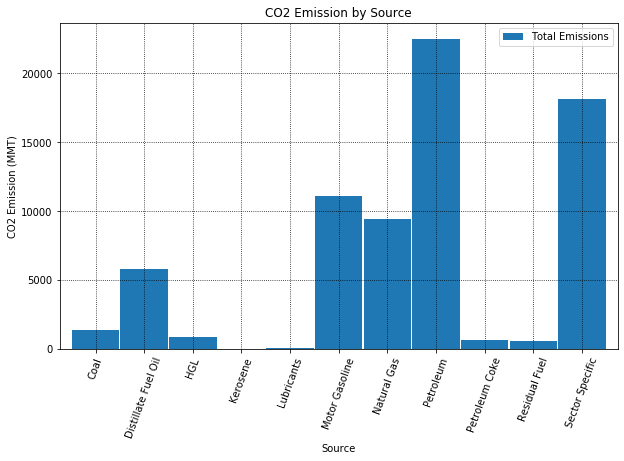

In [14]:
ax = co2_ems_10Y_gbso_df1.plot(kind='bar', width=.975, figsize=(10, 6))
# plt.figure(figsize=(12, 8))
# fig = plt.figure(figsize=(10, 6))

ax.set_title("CO2 Emission by Source")
ax.set_xlabel("Source")
ax.set_ylabel("CO2 Emission (MMT)")
# x_labels = pd.Series((v[1] for v in first_last_list))
# ax.set_xticklabels(x_labels)
plt.grid(b=True, which='major', color='black', linestyle=':')
plt.xticks(rotation=70)
# plt.legend(handlelength=1.)
plt.savefig("CO2EmissionBySource.png")           
plt.show()

In [15]:
co2_ems_nosingle_df

,sector,source,year,value
0,Industrial,Coal,2018,109.967
1,Industrial,Coal,2017,111.616
2,Industrial,Coal,2016,112.702
3,Industrial,Coal,2015,128.941
4,Industrial,Coal,2014,143.075
5,Industrial,Coal,2013,144.563
6,Industrial,Coal,2012,141.470
7,Industrial,Coal,2011,145.983
8,Industrial,Coal,2010,152.679
9,Industrial,Coal,2009,130.545


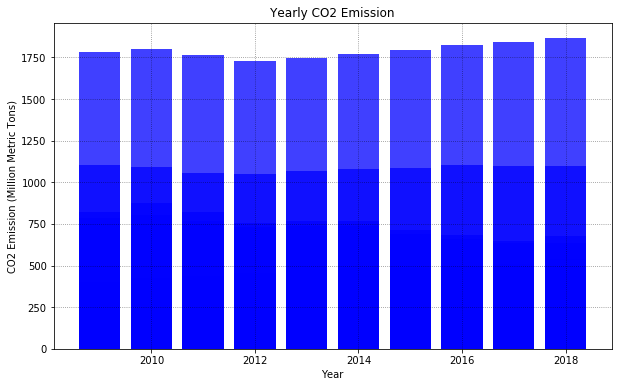

In [16]:
fig = plt.figure(figsize=(10, 6))
plt.bar(co2_ems_nosingle_df["year"],
            co2_ems_nosingle_df["value"], 
            color="Blue", 
            alpha=.75)

plt.title("Yearly CO2 Emission")
plt.ylabel("CO2 Emission (Million Metric Tons)")
plt.xlabel("Year")

plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)

In [17]:
co2_sec_group_value_df = co2_ems_nosingle_df[["year", "sector", "value"]]

co2_sec_group_value_df = co2_sec_group_value_df.groupby(["sector", "year" ])["value"].sum()
co2_sec_group_value_df = pd.DataFrame({"values":co2_sec_group_value_df})
co2_sec_group_value_df = co2_sec_group_value_df.reset_index()
co2_sec_group_value_df

,sector,year,values
0,Commercial,2009,1054.233
1,Commercial,2010,1071.039
2,Commercial,2011,1034.949
3,Commercial,2012,971.230
4,Commercial,2013,997.786
5,Commercial,2014,1010.748
6,Commercial,2015,993.390
7,Commercial,2016,952.480
8,Commercial,2017,924.376
9,Commercial,2018,951.239


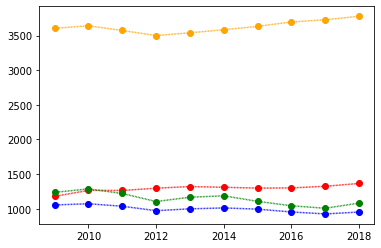

In [18]:
y_columns = ["Industrial", "Transportation", "Residential", "Commercial"]
# x_ind = co2_ems_nosingle_df[co2_ems_nosingle_df.sector == "Industrial"].year
x_ind = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Industrial"]
y_ind = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Industrial"]

x_com = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Commercial"]
y_com = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Commercial"]


x_res = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Residental"]
y_res = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Residental"]


x_trn = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Transportation"]
y_trn = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Transportation"]

# sec_grouped_df = co2_ems_nosingle_df.groupby([ "sector", "year"])["value"].sum()
# x_ind = sec_grouped_df[sec_grouped_df["sector"]=="Industrial"]

# y_ind

plt.plot(x_ind, y_ind, color="red", linestyle=(0, (.5,.5)), marker="o")
plt.plot(x_com, y_com, color="blue", linestyle=(0, (.5,.5)), marker="o")
plt.plot(x_res, y_res, color="green", linestyle=(0, (.5,.5)), marker="o")
plt.plot(x_trn, y_trn, color="orange", linestyle=(0, (.5,.5)), marker="o")


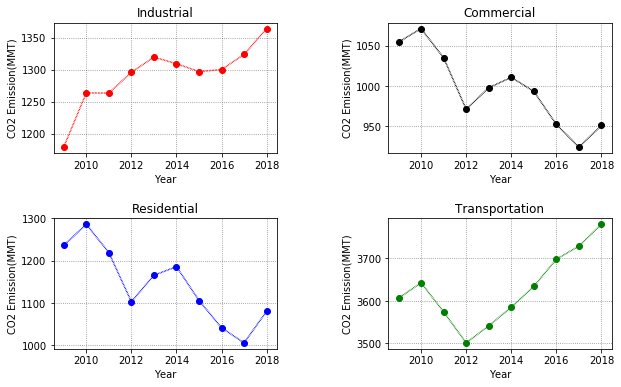

In [19]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.subplots_adjust(hspace=.5)

plt.subplots_adjust (wspace=.5)


plt.plot(x_ind, y_ind, color="red", linestyle=(0, (.5,.5)), marker="o")
plt.title("Industrial")
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CO2 Emission(MMT)")

plt.subplot(2, 2, 2)
plt.plot(x_com, y_com, color="black", linestyle=(0, (.5,.5)), marker="o")
plt.title("Commercial")
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CO2 Emission(MMT)")

plt.subplot(2, 2, 3)
plt.plot(x_res, y_res, color="blue", linestyle=(0, (.5,.5)), marker="o")
plt.title("Residential")
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CO2 Emission(MMT)")

plt.subplot(2, 2, 4)
plt.plot(x_trn, y_trn, color="green", linestyle=(0, (.5,.5)), marker="o")
plt.title("Transportation")
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CO2 Emission(MMT)")
plt.savefig("CO2EmissionTrendSubplot.png")
plt.show()


In [17]:

co2_sec_value = co2_ems_nosingle_df[["sector", "value"]]

co2_sec_value
# plt.plot(x_trans, y_trans, color="green", linestyle=(0, (.5,.5)),marker="s")
# plt.plot(x_resi, y_resi, color="blue", linestyle=(0, (.5,.5)),marker="d")
# plt.plot(x_comm, y_comm, color="black", linestyle=(0, (.5,.5)),marker="^")

# plt.legend(y_columns)

# plt.title("Total Energy Consumption by Sector")
# plt.xlabel("Year")
# plt.ylabel("Total Energy Consumed (Trillion Btu)")

# plt.grid()


# # Save the Figure
# plt.savefig('Total Energy_Energy Consumption by Sector.png')
# # Show the Figure
# plt.show()

,sector,value
0,Industrial,109.967
1,Industrial,111.616
2,Industrial,112.702
3,Industrial,128.941
4,Industrial,143.075
5,Industrial,144.563
6,Industrial,141.470
7,Industrial,145.983
8,Industrial,152.679
9,Industrial,130.545


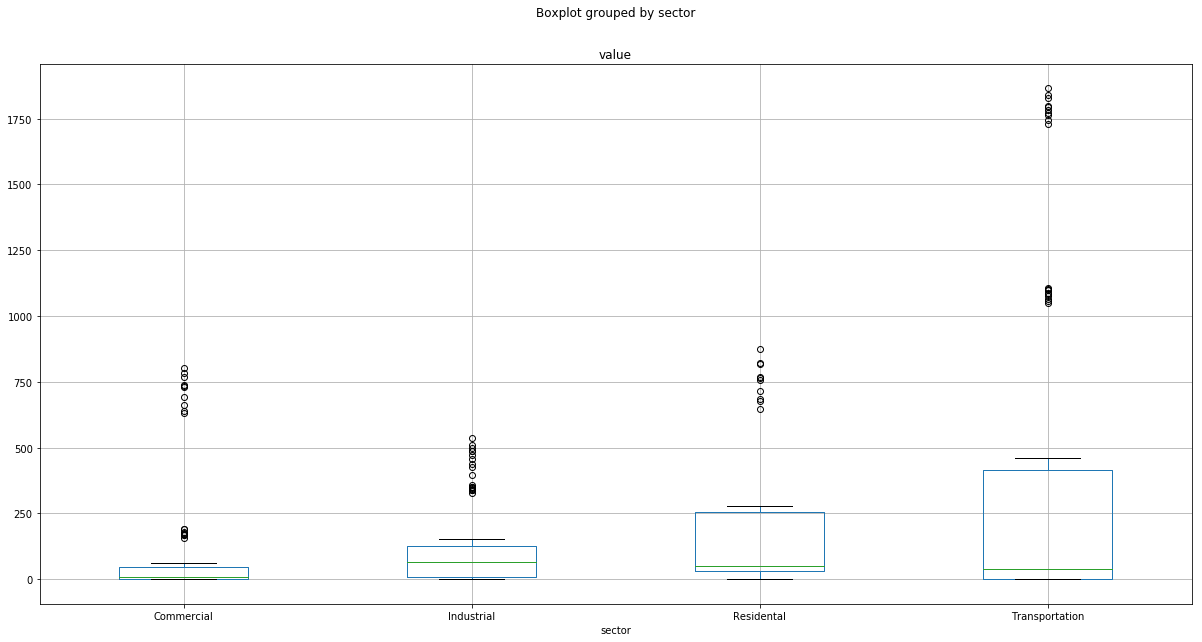

In [18]:
# co2_sec_value
co2_sec_value.boxplot("value", by="sector", figsize=(20, 10))

In [19]:
import scipy.stats as stats

co2_sec_value=co2_sec_value.round({'value':0}).dropna()

group2 = co2_sec_value[co2_sec_value["sector"] == "Transportation"]["value"]
group4 = co2_sec_value[co2_sec_value["sector"] == "Commercial"]["value"]
group3 = co2_sec_value[co2_sec_value["sector"] == "Residental"]["value"]
group1 = co2_sec_value[co2_sec_value["sector"] == "Industrial"]["value"]


# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4)
# low pvalue tells atleast one of these is different


F_onewayResult(statistic=9.77611676380672, pvalue=3.175321817861175e-06)

In [20]:
# Calculate the population mean for Transportation and Commercial
tran = co2_sec_value[co2_sec_value["sector"] == "Transportation"]
tran.value.mean()
com = co2_sec_value[co2_sec_value["sector"] == "Commercial"]
com.value.mean()

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(tran.value, com.value, equal_var=False)

Ttest_indResult(statistic=3.9990015499478924, pvalue=0.00010166620358948757)

In [21]:
# Calculate the population mean for Transportation and Residental
tran = co2_sec_value[co2_sec_value["sector"] == "Transportation"]
tran.value.mean()
res = co2_sec_value[co2_sec_value["sector"] == "Residental"]
res.value.mean()

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(tran.value, res.value, equal_var=False)

Ttest_indResult(statistic=2.187456572677531, pvalue=0.030109137158130787)

In [22]:
# Calculate the population mean for Transportation and Industrial
tran = co2_sec_value[co2_sec_value["sector"] == "Transportation"]
tran.value.mean()
ind = co2_sec_value[co2_sec_value["sector"] == "Industrial"]
ind.value.mean()

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(tran.value, ind.value, equal_var=False)

Ttest_indResult(statistic=3.844929124973709, pvalue=0.00019172090150524655)

In [23]:
# Calculate the population mean for Commercial and Residental
com = co2_sec_value[co2_sec_value["sector"] == "Commercial"]
com.value.mean()
res = co2_sec_value[co2_sec_value["sector"] == "Residental"]
res.value.mean()

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(com.value, res.value, equal_var=False)

Ttest_indResult(statistic=-2.230194236512595, pvalue=0.02789118212872117)

In [24]:
# Calculate the population mean for Commercial and Industrial
com = co2_sec_value[co2_sec_value["sector"] == "Commercial"]
com.value.mean()
ind = co2_sec_value[co2_sec_value["sector"] == "Industrial"]
ind.value.mean()

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(com.value, ind.value, equal_var=False)

Ttest_indResult(statistic=-0.69502955633174, pvalue=0.48796805168862656)

In [25]:
# Calculate the population mean for Residental and Industrial
res = co2_sec_value[co2_sec_value["sector"] == "Residental"]
res.value.mean()
ind = co2_sec_value[co2_sec_value["sector"] == "Industrial"]
ind.value.mean()

# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(res.value, ind.value, equal_var=False)

Ttest_indResult(statistic=1.9542319519698639, pvalue=0.054223544745046294)

# Combined Graph

In [54]:
energy_cons_df = pd.read_csv("MasterConsumptionResComTrnInd.csv")
energy_cons_df = energy_cons_df[["sector", "year", "value"]]
energy_cons_df = energy_cons_df.loc[energy_cons_df["year"] > 2008 ]
energy_cons_df

,sector,year,value
240,Commercial,2009,17887.561
241,Transportation,2009,26588.888
242,Industrial,2009,28465.439
243,Residential,2009,21081.368
244,Industrial,2010,30670.436
245,Commercial,2010,18058.632
246,Transportation,2010,26978.400
247,Residential,2010,21894.159
248,Transportation,2011,26598.624
249,Residential,2011,21381.247


In [28]:
ec_sec_group_value_df = energy_cons_df[["year", "sector", "value"]]

ec_sec_group_value_df = ec_sec_group_value_df.groupby(["sector", "year" ])["value"].sum()
ec_sec_group_value_df = pd.DataFrame({"values":ec_sec_group_value_df})
ec_sec_group_value_df = ec_sec_group_value_df.reset_index()
ec_sec_group_value_df

,sector,year,values
0,Commercial,2009,17887.561
1,Commercial,2010,18058.632
2,Commercial,2011,17981.378
3,Commercial,2012,17421.351
4,Commercial,2013,17929.446
5,Commercial,2014,18264.465
6,Commercial,2015,18156.728
7,Commercial,2016,18030.223
8,Commercial,2017,17899.252
9,Commercial,2018,18607.551


In [55]:
y_columns = ["Industrial", "Transportation", "Residential", "Commercial"]
# x_ind = co2_ems_nosingle_df[co2_ems_nosingle_df.sector == "Industrial"].year
# x_ind = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Industrial"]
# y_ind = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Industrial"]

# x_com = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Commercial"]
# y_com = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Commercial"]


x_resCO2 = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Residental"]
y_resCO2 = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Residental"]


x_trnCO2 = co2_sec_group_value_df["year"].loc[co2_sec_group_value_df["sector"] == "Transportation"]
y_trnCO2 = co2_sec_group_value_df["values"].loc[co2_sec_group_value_df["sector"] == "Transportation"]

x_resEC = ec_sec_group_value_df["year"].loc[ec_sec_group_value_df["sector"] == "Residential"]
y_resEC = ec_sec_group_value_df["values"].loc[ec_sec_group_value_df["sector"] == "Residential"]


x_trnEC = ec_sec_group_value_df["year"].loc[ec_sec_group_value_df["sector"] == "Transportation"]
y_trnEC = ec_sec_group_value_df["values"].loc[ec_sec_group_value_df["sector"] == "Transportation"]


In [56]:
ec_sec_group_value_df.dtypes

sector     object
year        int64
values    float64
dtype: object

In [57]:
co2_sec_group_value_df.dtypes

sector     object
year        int64
values    float64
dtype: object

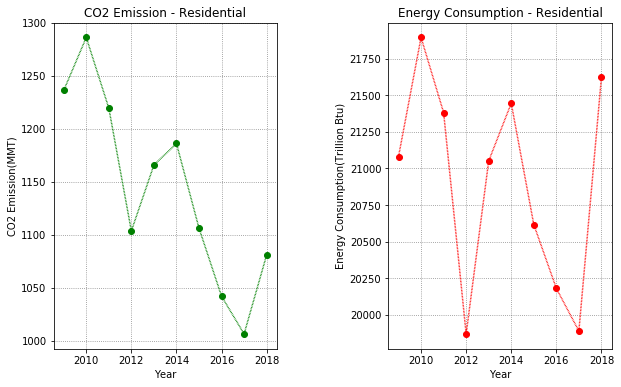

In [58]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.subplots_adjust(hspace=.5)

plt.subplots_adjust (wspace=.5)

# plt.plot(x_ind, y_ind, color="red", linestyle=(0, (.5,.5)), marker="o")
# plt.title("Industrial")
# plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
# plt.xlabel("Year")
# plt.ylabel("CO2 Emission(MMT)")

# plt.subplot(2, 2, 2)
# plt.plot(x_com, y_com, color="blue", linestyle=(0, (.5,.5)), marker="o")
# plt.title("Commercial")
# plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
# plt.xlabel("Year")
# plt.ylabel("CO2 Emission(MMT)"
           
plt.subplot(1, 2, 1)
plt.plot(x_resCO2, y_resCO2, color="green", linestyle=(0, (.5,.5)), marker="o")
plt.title("CO2 Emission - Residential")
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CO2 Emission(MMT)")

plt.subplot(1, 2, 2)
plt.plot(x_resEC, y_resEC, color="red", linestyle=(0, (.5,.5)), marker="o")
plt.title("Energy Consumption - Residential")
plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Energy Consumption(Trillion Btu)")
plt.savefig("EnergyConsumptionAndCO2Emission.png")
plt.show()

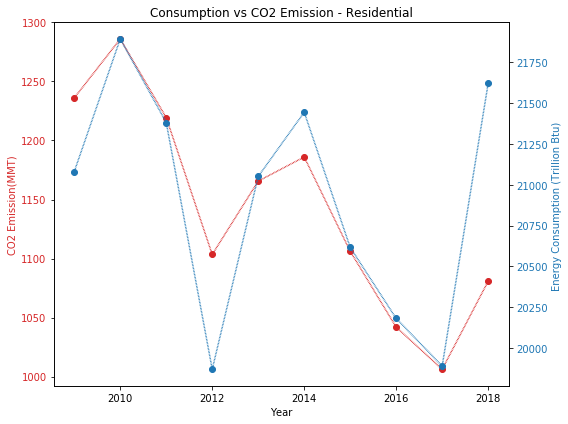

In [59]:
# plt.subplot(1, 2, 1)

fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:red'

plt.title("Consumption vs CO2 Emission - Residential")

ax1.set_xlabel(("Year"))
ax1.set_ylabel('CO2 Emission(MMT)', color=color)
plt.plot(x_resCO2, y_resCO2, color=color, linestyle=(0, (.5,.5)), marker="o")

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Energy Consumption (Trillion Btu) ', color=color)  
plt.plot(x_resEC, y_resEC, color=color, linestyle=(0, (.5,.5)), marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.savefig("EnergyConsumAndCO2EmsResCombined.png")
plt.show()

# plt.subplot(1, 2, 1)
# plt.plot(x_resCO2, y_resCO2, color="green", linestyle=(0, (.5,.5)), marker="o")
# plt.title("CO2 Emission - Residential")
# plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
# plt.xlabel("Year")
# plt.ylabel("CO2 Emission(MMT)")

# plt.subplot(1, 2, 2)
# plt.plot(x_resEC, y_resEC, color="red", linestyle=(0, (.5,.5)), marker="o")
# plt.title("Energy Consumption - Residential")
# plt.grid(b=True, which='major', color='black', linestyle=':', alpha=0.5)
# plt.xlabel("Year")
# plt.ylabel("Energy Consumption(Trillion Btu)")

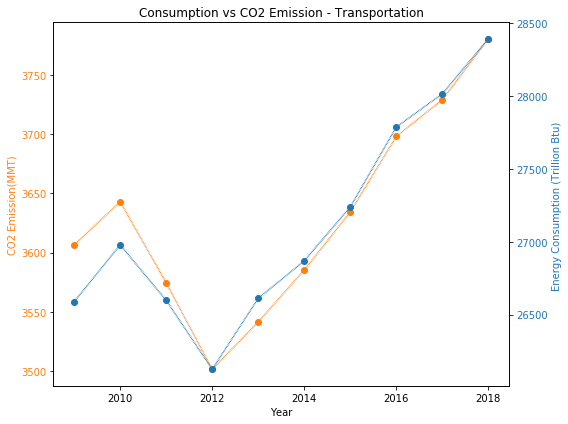

In [60]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:orange'

plt.title("Consumption vs CO2 Emission - Transportation")

ax1.set_xlabel(("Year"))
ax1.set_ylabel('CO2 Emission(MMT)', color=color)
plt.plot(x_trnCO2, y_trnCO2, color=color, linestyle=(0, (.5,.5)), marker="o")

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Energy Consumption (Trillion Btu) ', color=color)  
plt.plot(x_trnEC, y_trnEC, color=color, linestyle=(0, (.5,.5)), marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.savefig("EnergyConsumAndCO2EmsTrnCombined.png")
plt.show()

# Combined for Totals

In [61]:
# energy_cons_df = pd.read_csv("MasterConsumptionResComTrnInd.csv")
# energy_cons_df = energy_cons_df[["sector", "year", "value"]]
# energy_cons_df = energy_cons_df.loc[energy_cons_df["year"] > 2008 ]
# energy_cons_df

ec_group_yv_df = energy_cons_df.groupby(["year" ])["value"].sum()
ec_group_yv_df = pd.DataFrame({"values":ec_group_yv_df})
ec_group_yv_df = ec_group_yv_df.reset_index()
ec_group_yv_df




,year,values
0,2009,94023.256
1,2010,97601.627
2,2011,96942.571
3,2012,94477.402
4,2013,97219.777
5,2014,98376.201
6,2015,97483.119
7,2016,97449.712
8,2017,97808.673
9,2018,101236.924


In [64]:
co2_group_yv_df = co2_sec_group_value_df.groupby(["year" ])["values"].sum()
co2_group_yv_df = pd.DataFrame({"values":co2_group_yv_df})
co2_group_yv_df = co2_group_yv_df.reset_index()
co2_group_yv_df

,year,values
0,2009,7075.961
1,2010,7263.926
2,2011,7092.367
3,2012,6872.152
4,2013,7024.450
5,2014,7091.473
6,2015,7030.899
7,2016,6992.735
8,2017,6983.578
9,2018,7176.746


In [65]:
x_allCO2 = co2_group_yv_df["year"]
y_allCO2 = co2_group_yv_df["values"]


x_allEC = ec_group_yv_df["year"]
y_allEC = ec_group_yv_df["values"]

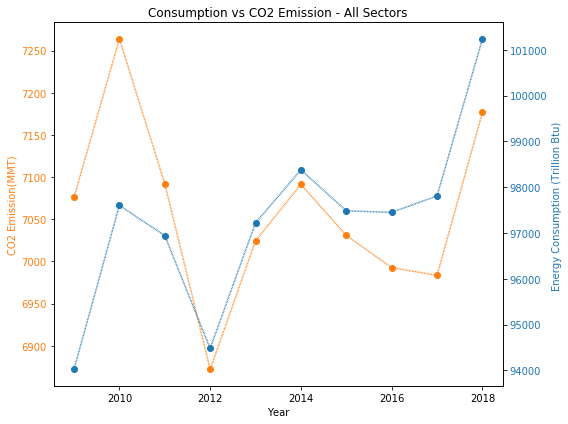

In [66]:
fig, ax1 = plt.subplots(figsize=(8, 6))

color = 'tab:orange'

plt.title("Consumption vs CO2 Emission - All Sectors")

ax1.set_xlabel(("Year"))
ax1.set_ylabel('CO2 Emission(MMT)', color=color)
plt.plot(x_allCO2, y_allCO2, color=color, linestyle=(0, (.5,.5)), marker="o")

ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('Energy Consumption (Trillion Btu) ', color=color)  
plt.plot(x_allEC, y_allEC, color=color, linestyle=(0, (.5,.5)), marker="o")
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.savefig("EnergyConsumAndCO2EmsAllSec.png")
plt.show()